<a href="https://colab.research.google.com/github/Elberthyindas/Data110_Fall_2025/blob/main/Appearences_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to explore and analyze real soccer performance data by using Python and data visualization techniques. The dataset contains information about player appearances, including minutes played, goals, assists, yellow cards, red cards, club affiliation, and competition details. By cleaning the dataset, identifying missing values, and generating visualizations, we can uncover meaningful insights about player performance and trends. Through the use of bar charts, scatter plots, and histograms, this project highlights key patterns such as the top goal scorers, the relationship between playing time and scoring, and how frequently players stay on the field for full matches.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (change filename if needed)
df = pd.read_csv("appearances.csv")

# Preview dataset
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


Before performing any visual analysis, it was important to clean the dataset and check for missing values. I used the .isna().sum() function to count how many values were missing in each column. Missing data can lead to incorrect conclusions or errors during visualization, so identifying them early ensures data accuracy.

In [3]:
# Structure of the dataset
df.info()

# Basic statistics for numeric columns
df.describe()

# Check if there are missing values in the dataset
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB


,0
appearance_id,0
game_id,0
player_id,0
player_club_id,0
player_current_club_id,0
date,0
player_name,6
competition_id,0
yellow_cards,0
red_cards,0


The first visualization is a bar chart showing the top 10 players with the most goals scored. This graph clearly highlights which players had the greatest offensive impact across all their appearances. A bar chart is appropriate here because it allows easy comparison between discrete categories — in this case, individual players. By sorting the players from highest to lowest goal totals, we can immediately see which players stand out as top performers.

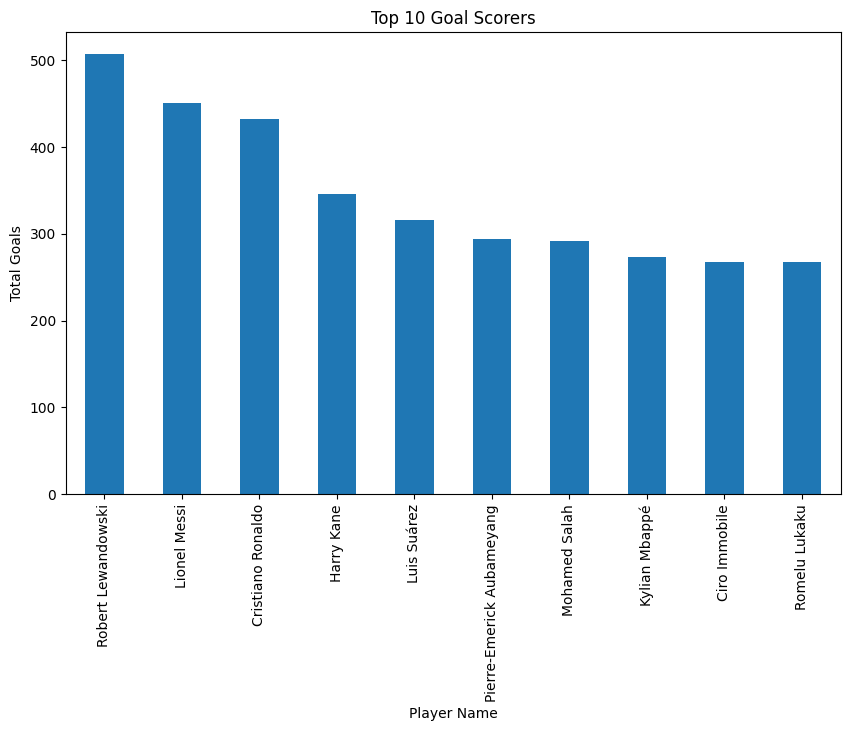

In [6]:
top_goal_scorers = df.groupby("player_name")["goals"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_goal_scorers.plot(kind="bar")
plt.title("Top 10 Goal Scorers")
plt.xlabel("Player Name")
plt.ylabel("Total Goals")
plt.show()

The second visualization is a scatter plot comparing the number of minutes played with the number of goals scored. This visualization helps explore whether there is a relationship between playing time and scoring. Each point represents a player appearance in a specific match. The scatter plot allows us to observe whether players who spend more time on the field tend to score more goals.


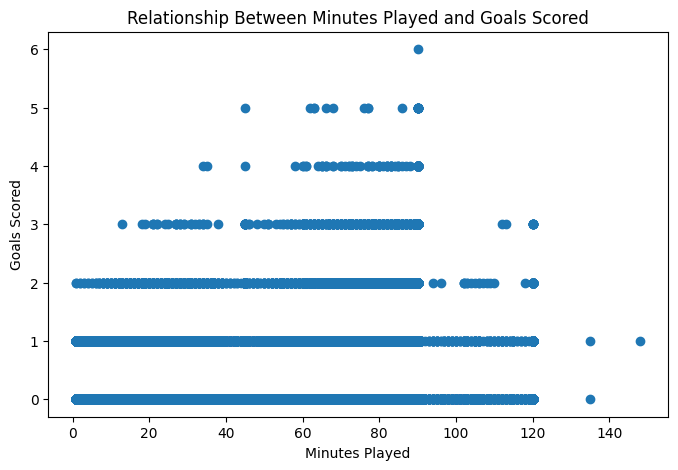

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df["minutes_played"], df["goals"])
plt.title("Relationship Between Minutes Played and Goals Scored")
plt.xlabel("Minutes Played")
plt.ylabel("Goals Scored")
plt.show()

The third visualization is a histogram that displays the distribution of minutes played by players. The histogram shows how often players play different amounts of time in matches, revealing patterns such as how many players play full 90-minute games versus how many are substituted. A histogram is useful here because it groups data into ranges, allowing us to easily identify common playing-time behaviors in the dataset. This visualization offers insight into coaching strategies and substitution patterns.

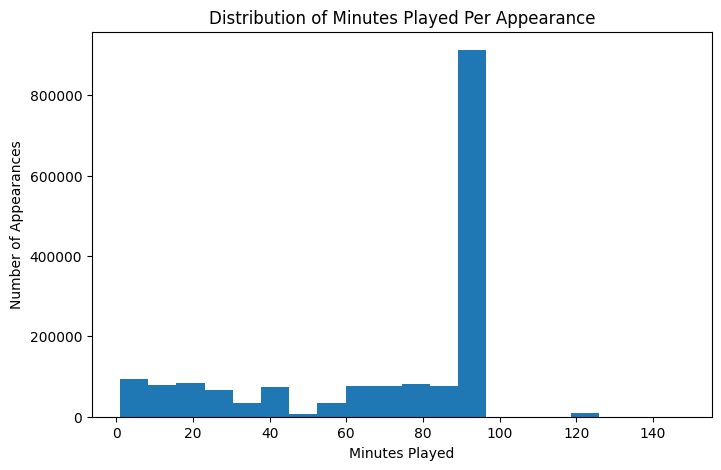

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df["minutes_played"], bins=20)  # histogram
plt.title("Distribution of Minutes Played Per Appearance")
plt.xlabel("Minutes Played")
plt.ylabel("Number of Appearances")
plt.show()